# Extract thông tin tài chính từ tin tức dùng medicalRAG

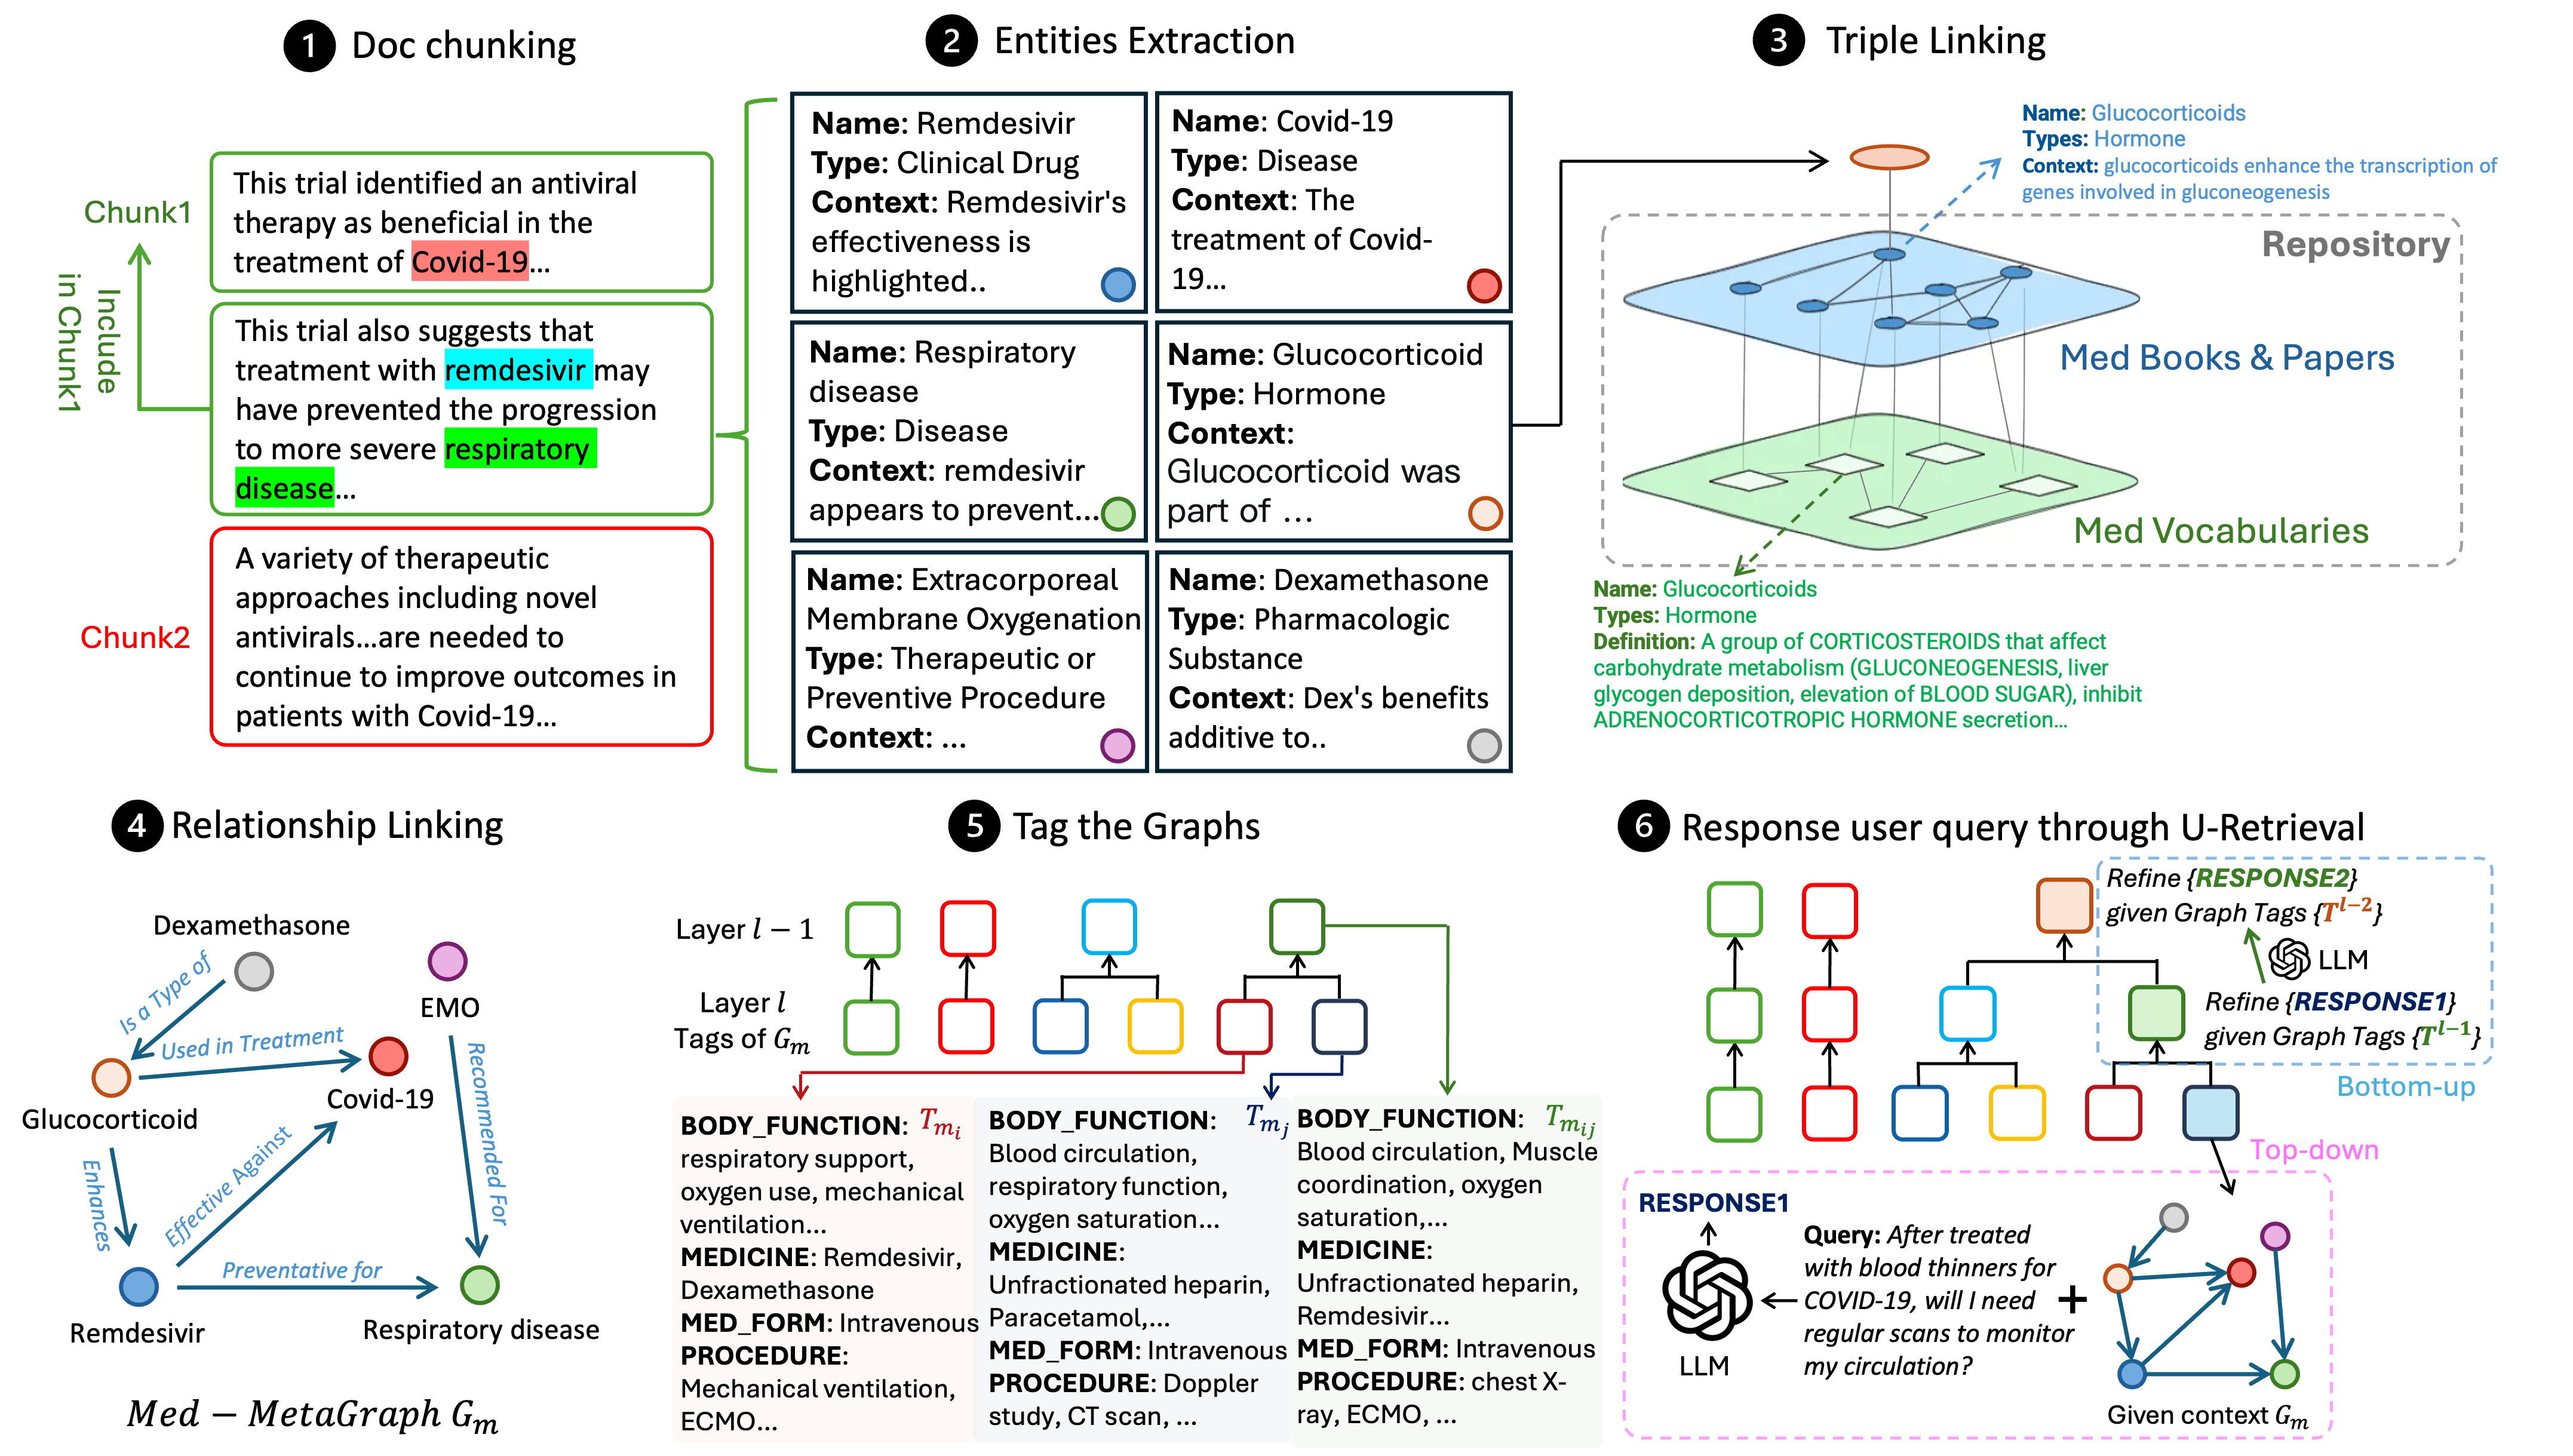

Ref:
https://arxiv.org/html/2408.04187

In [1]:
# %pip install llama-index llama-index-node-parser-topic

  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
vi-core-news-lg 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.8.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from dotenv import load_dotenv
import os
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core import Settings

import nest_asyncio
nest_asyncio.apply()

# Load the .env file

load_dotenv('../.env')

# Access the OpenAI key
openai_key = os.getenv("OPENAI_API_KEY")

llm = OpenAI(model="gpt-4o-mini", api_key=openai_key)
embed_model = OpenAIEmbedding(model="text-embedding-3-small")

Settings.llm = llm
Settings.embed_model = embed_model


In [5]:
from llama_index.core import SimpleDirectoryReader
from llama_index.core import PropertyGraphIndex
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.llms.openai import OpenAI

from llama_index.graph_stores.neo4j import Neo4jPropertyGraphStore

documents = SimpleDirectoryReader(input_files=['../data/bao-chi/nvidia.md']).load_data()
print("length of documents:", len(documents))
print('documents:', documents[0])



length of documents: 1
documents: Doc ID: e8429ecd-fb42-45f7-a43c-6542b8420ce2
Text: Nvidia to take Intel's spot on Dow Jones Industrial Average  By
Arsheeya Bajwa  (Reuters) -Intel will be replaced by Nvidia
(NASDAQ:NVDA) on the blue-chip Dow Jones Industrial Average index
after a 25-year run, underscoring the shift in the chipmaking market
and marking another setback for the struggling semiconductor firm.
Nvidia will join the...


In [6]:
from llama_index.node_parser.topic import TopicNodeParser
node_parser = TopicNodeParser.from_defaults(
    llm=llm,
    max_chunk_size=1000,
    similarity_method="llm",  # can be "llm" or "embedding"
    window_size=2,  # paper suggests window_size=5
)

In [7]:
nodes = node_parser.get_nodes_from_documents(documents, show_progress=True)

/Users/ngocp/Documents/projects/finance-bot/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Parsing nodes: 100%|██████████| 1/1 [02:22<00:00, 142.56s/it]


In [35]:
print(len(nodes))

73


In [37]:
from llama_index.core.response.notebook_utils import display_source_node

for node in nodes:
    print('-------------------------')
    # print(node.json())
    print(node.get_content())

-------------------------
Nvidia will take Intel's spot on the Dow Jones Industrial Average.
-------------------------
Nvidia is a technology company. Intel is a technology company.
-------------------------
The Dow Jones Industrial Average is a stock market index.
-------------------------
Arsheeya Bajwa is a named entity.
-------------------------
Nvidia will take Intel's spot on the Dow Jones Industrial Average.
-------------------------
Nvidia is a technology company. Intel is a technology company.
-------------------------
The Dow Jones Industrial Average is a stock market index.
-------------------------
Arsheeya Bajwa is a named entity.
-------------------------
Intel will be replaced by Nvidia on the blue-chip Dow Jones Industrial Average index. Nvidia is listed on NASDAQ under the ticker symbol NVDA. Intel had a 25-year run on the Dow Jones Industrial Average index. The replacement of Intel by Nvidia underscores the shift in the chipmaking market. The replacement of Intel mark